In [1]:
import numpy as np
import pandas as pd 
import re
import bs4 
from bs4 import BeautifulSoup
import requests as req


In [2]:
data=req.get('https://influencermarketinghub.com/25-most-popular-instagram-hashtags/')
data

<Response [200]>

In [3]:
data_bs=BeautifulSoup(data.text)


In [4]:
df=data_bs.find_all("li",style="font-weight: 400;")
df

[<li style="font-weight: 400;"><span style="font-weight: 400;">#love</span></li>,
 <li style="font-weight: 400;"><span style="font-weight: 400;">#instagood</span></li>,
 <li style="font-weight: 400;"><span style="font-weight: 400;">#photooftheday</span></li>,
 <li style="font-weight: 400;"><span style="font-weight: 400;">#fashion</span></li>,
 <li style="font-weight: 400;"><span style="font-weight: 400;">#beautiful</span></li>,
 <li style="font-weight: 400;"><span style="font-weight: 400;">#happy</span></li>,
 <li style="font-weight: 400;"><span style="font-weight: 400;">#cute</span></li>,
 <li style="font-weight: 400;"><span style="font-weight: 400;">#tbt</span></li>,
 <li style="font-weight: 400;"><span style="font-weight: 400;">#like4like</span></li>,
 <li style="font-weight: 400;"><span style="font-weight: 400;">#followme</span></li>,
 <li style="font-weight: 400;"><span style="font-weight: 400;">#picoftheday</span></li>,
 <li style="font-weight: 400;"><span style="font-weight: 400

In [10]:
Name_tag=[]
for i in df:
    name_tag=i.text
    #print(name_tag)
    model = re.findall(r'[a-z]+',name_tag)
    #print(model)
    Name_tag.append(''.join(model))
    

In [12]:
Name_tag=set(Name_tag)
print(Name_tag)

{'instagood', 'follow', 'selfie', 'style', 'fashion', 'followme', 'happy', 'food', 'summer', 'photooftheday', 'likelike', 'fun', 'beautiful', 'girl', 'friends', 'me', 'tbt', 'cute', 'picoftheday', 'art', 'smile', 'love', 'repost', 'nature', 'instadaily'}


In [13]:
Name_tag=list(filter(lambda a:a.strip(),Name_tag))
#+Name_tag

['instagood',
 'follow',
 'selfie',
 'style',
 'fashion',
 'followme',
 'happy',
 'food',
 'summer',
 'photooftheday',
 'likelike',
 'fun',
 'beautiful',
 'girl',
 'friends',
 'me',
 'tbt',
 'cute',
 'picoftheday',
 'art',
 'smile',
 'love',
 'repost',
 'nature',
 'instadaily']

In [8]:
len(Name_tag)

25

In [14]:
r='https://www.instagram.com/explore/tags/'
Posts=[]
for i in Name_tag:
    link=r+i
    print(link)
    x= req.get(link)
    print(x)
    y= BeautifulSoup(x.text,'html.parser')
    z= y.find('meta', {'name':"description"})['content']
    print(z)
    posts=re.findall(r'\d*\.\d+|\d+',z+str(Name_tag))#[-+]?\d*\.\d+|\d+
    Posts.append(''.join(posts))
    print(posts)


https://www.instagram.com/explore/tags/instagood
<Response [200]>
1b Posts - See Instagram photos and videos from ‘instagood’ hashtag
['1']
https://www.instagram.com/explore/tags/follow
<Response [200]>
518m Posts - See Instagram photos and videos from ‘follow’ hashtag
['518']
https://www.instagram.com/explore/tags/selfie
<Response [200]>
409.2m Posts - See Instagram photos and videos from ‘selfie’ hashtag
['409.2']
https://www.instagram.com/explore/tags/style
<Response [200]>
434.1m Posts - See Instagram photos and videos from ‘style’ hashtag
['434.1']
https://www.instagram.com/explore/tags/fashion
<Response [200]>
746.8m Posts - See Instagram photos and videos from ‘fashion’ hashtag
['746.8']
https://www.instagram.com/explore/tags/followme
<Response [200]>
505.8m Posts - See Instagram photos and videos from ‘followme’ hashtag
['505.8']
https://www.instagram.com/explore/tags/happy
<Response [200]>
550.6m Posts - See Instagram photos and videos from ‘happy’ hashtag
['550.6']
https://ww

In [18]:
Posts

['1',
 '518',
 '409.2',
 '434.1',
 '746.8',
 '505.8',
 '550.6',
 '363.5',
 '444.6',
 '732.4',
 '12.5',
 '370.4',
 '622.2',
 '375.9',
 '382.7',
 '408.3',
 '509.6',
 '537.2',
 '531.7',
 '569.6',
 '346.9',
 '1.7',
 '435.3',
 '472.6',
 '416.3']

In [19]:
type(Posts)

list

In [74]:
New_posts=[]
for i in Posts:
    e = float(i) 
    if e<=1.8:
        e=e*1000
        New_posts.append(e)
        print(New)
    else:
        New_posts.append(e)
        print(e)
    

1700.0
518.0
409.2
434.1
746.8
505.8
550.6
363.5
444.6
732.4
12.5
370.4
622.2
375.9
382.7
408.3
509.6
537.2
531.7
569.6
346.9
1700.0
435.3
472.6
416.3


In [76]:
len(New_posts)

25

In [87]:
Data_Frame=list(zip(Name_tag,New_posts)) ## now merge them by using zip().
Data_Frame

[('instagood', 1000.0),
 ('follow', 518.0),
 ('selfie', 409.2),
 ('style', 434.1),
 ('fashion', 746.8),
 ('followme', 505.8),
 ('happy', 550.6),
 ('food', 363.5),
 ('summer', 444.6),
 ('photooftheday', 732.4),
 ('likelike', 12.5),
 ('fun', 370.4),
 ('beautiful', 622.2),
 ('girl', 375.9),
 ('friends', 382.7),
 ('me', 408.3),
 ('tbt', 509.6),
 ('cute', 537.2),
 ('picoftheday', 531.7),
 ('art', 569.6),
 ('smile', 346.9),
 ('love', 1700.0),
 ('repost', 435.3),
 ('nature', 472.6),
 ('instadaily', 416.3)]

In [88]:
# creating a data frame for Instagram-see photos and Videos
Data_Frame_df=pd.DataFrame(Data_Frame,columns=['#Tags of Instagram','Instagram photos and videos in (millions)'])
Data_Frame_df.index+=1
Data_Frame_df.index

RangeIndex(start=1, stop=26, step=1)

In [89]:
Data_Frame_df

,#Tags of Instagram,Instagram photos and videos in (millions)
1,instagood,1000.0
2,follow,518.0
3,selfie,409.2
4,style,434.1
5,fashion,746.8
6,followme,505.8
7,happy,550.6
8,food,363.5
9,summer,444.6
10,photooftheday,732.4


In [90]:
Data_Frame_df.describe()


,Instagram photos and videos in (millions)
count,25.00000
mean,535.84800
std,299.97648
min,12.50000
25%,408.30000
50%,472.60000
75%,550.60000
max,1700.00000


In [94]:
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline

<Figure size 1440x1080 with 0 Axes>

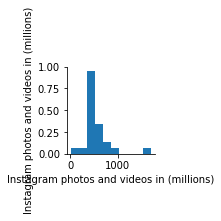

In [96]:
plt.figure(figsize=(20,15))
sb.pairplot(Data_Frame_df)

In [97]:
Data_Frame_df.columns

Index(['#Tags of Instagram', 'Instagram photos and videos in (millions)'], dtype='object')

<Figure size 7200x2880 with 0 Axes>

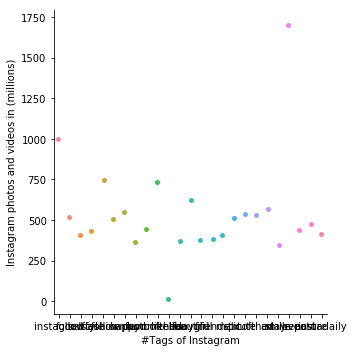

In [105]:
plt.figure(figsize=(100,40))
sb.catplot(x="#Tags of Instagram",y='Instagram photos and videos in (millions)',data=Data_Frame_df)

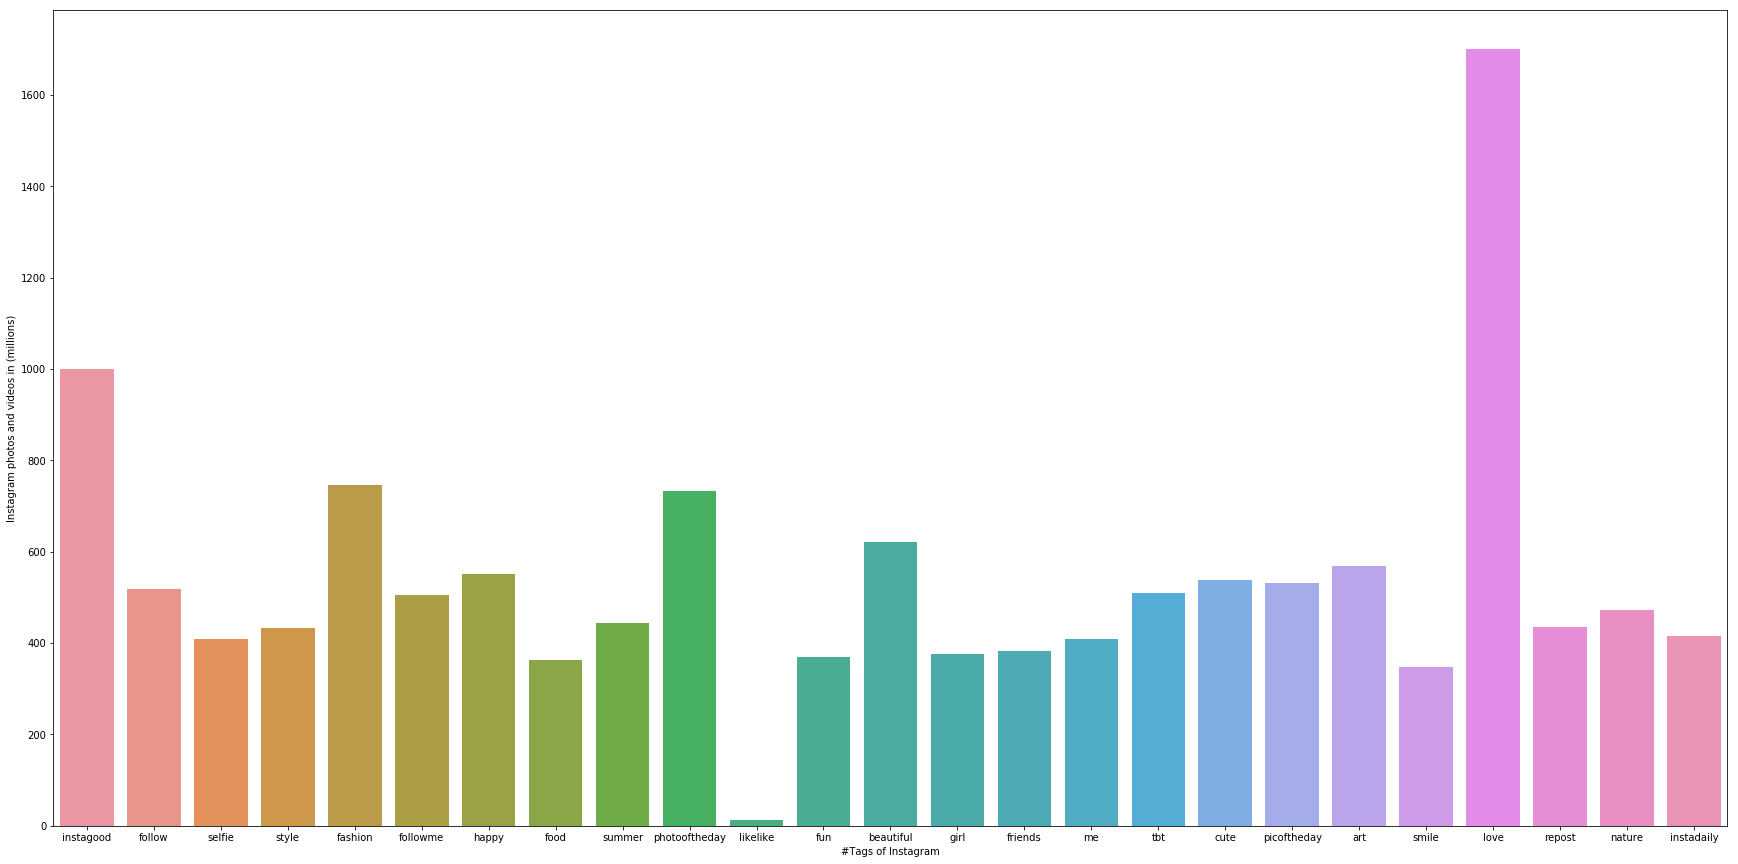

In [112]:
plt.figure(figsize=(30,15))
sb.barplot(x="#Tags of Instagram",y='Instagram photos and videos in (millions)',data=Data_Frame_df)

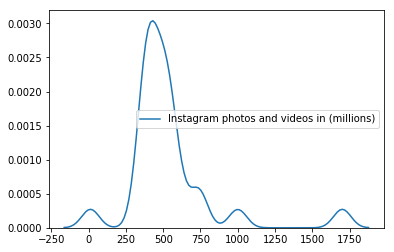

In [114]:
sb.kdeplot(Data_Frame_df['Instagram photos and videos in (millions)'])

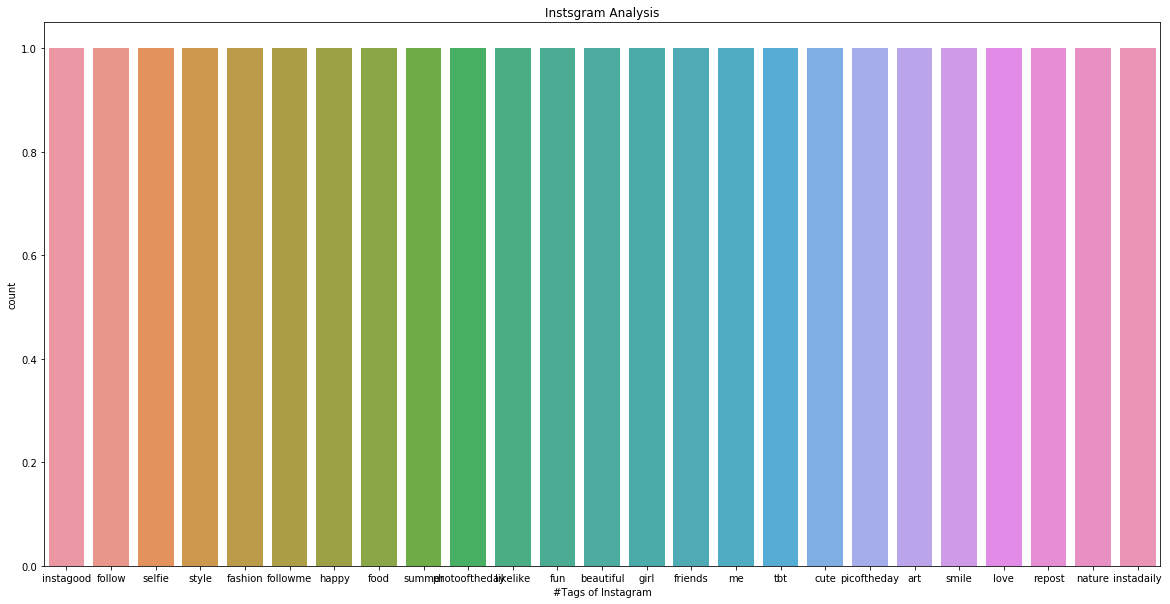

In [118]:
plt.figure(figsize=(20,10))
plt.title('Instsgram Analysis')
sb.countplot(x="#Tags of Instagram",data=Data_Frame_df)